In [2]:
import nltk 
nltk.download('gutenberg')
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import nltk 
from nltk.corpus import stopwords #For stopwords

import seaborn as sns #makes our plots look nicer

import scipy

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Timot\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [1]:
#anthro_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\anthro_data\anthro_df.pk1')
#econ_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\econ_data\econ_df.pk1')
#ling_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\ling_data\ling_df.pk1')
#soc_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\soc_df.pk1')
cog_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\psych_data\cog_psych_df.pk1')
soc_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\soc_psych_df.pk1')
#mech_soc_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\mechanisms\mech_soc_df.pk1')
#mech_cog_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\psych_data\mechanisms\psych_df.pk1')

NameError: name 'pd' is not defined

In [146]:
d_list = []
for i in mech_cog_df['contents']:
    d_list.append('social psychology')
mech_soc_df['discipline'] = d_list

In [147]:
mech_soc_df['tokenized_text'] = mech_soc_df['contents'].apply(lambda x: nltk.word_tokenize(x))

mech_soc_df['word_counts'] = mech_soc_df['tokenized_text'].apply(lambda x: len(x))

In [141]:
#generates a stop list to filter the corpus
countsDict = {}
for word in mech_cog_df['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('the', 1775),
 (',', 1503),
 ('of', 1032),
 ('.', 901),
 ('and', 701),
 ('to', 657),
 ('in', 484),
 ('a', 480),
 ('[', 338),
 (']', 338),
 ('that', 337),
 ('is', 315),
 (')', 297),
 ('(', 289),
 ('on', 218),
 ('with', 209),
 ('as', 204),
 ('was', 197),
 ('for', 195),
 ('by', 194),
 ('training', 177),
 ('were', 168),
 ('be', 154),
 ('are', 149),
 ('The', 147),
 ('an', 130),
 ('from', 124),
 ('=', 124),
 ('or', 106),
 ('alcohol', 99),
 ('we', 98),
 ('practice', 95),
 ('between', 94),
 ('this', 92),
 ('not', 90),
 ('In', 88),
 ('mindfulness', 84),
 ('used', 80),
 ('patients', 79),
 ('data', 78),
 ('which', 74),
 ('have', 73),
 ('’', 72),
 ('more', 70),
 ('prediction', 67),
 ('these', 67),
 (':', 67),
 ('tendency', 67),
 ('action', 66),
 ('one', 63)]

In [164]:
#sets stop list to begin after 'human'
#The stop list is then all words that occur before the first noun
stop_words_freq = []
for word, count in word_counts:
    if word == 'participants':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

In [149]:
#creates a function for normalizing the tokens
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

mech_soc_df['normalized_tokens'] = mech_soc_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

mech_soc_df['normalized_tokens_count'] = mech_soc_df['normalized_tokens'].apply(lambda x: len(x))


In [151]:
mech_cog_df.iloc[:10]

,contents,subjects,titles,year_publish,discipline,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,Classification is a pattern recognition task t...,"[data mining, medicine, clinical genetics, eng...",Ant Colony Optimization Algorithm for Interpre...,2014,cognitive psychology,"[Classification, is, a, pattern, recognition, ...",10627,"[classif, pattern, recognit, task, ha, applic,...",5161
1,Traumatic brain injury (TBI) constitutes a maj...,"[head injury, medicine, cognitive neurology, e...",Deficits in Facial Emotion Recognition Indicat...,2013,cognitive psychology,"[Traumatic, brain, injury, (, TBI, ), constitu...",5935,"[traumat, brain, injuri, tbi, constitut, major...",2908
2,A decade after the first meta-analysis showing...,"[sociology, medicine, survey research, mental ...",Relationship between Meditative Practice and S...,2014,cognitive psychology,"[A, decade, after, the, first, meta-analysis, ...",5452,"[decad, first, show, benefici, effect, mind, h...",2495
3,A defining feature of alcohol addiction is the...,"[medicine, public health, alcohol, psychology,...",The Effect of Approach/Avoidance Training on A...,2014,cognitive psychology,"[A, defining, feature, of, alcohol, addiction,...",8020,"[defin, featur, alcohol, addict, inabl, contro...",3770


In [152]:
#saves data frames 
mech_soc_df.to_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\mechanisms\mech_soc_df.pk1') #saves

In [17]:
#loads dataframe 
soc_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\soc_norm_filt_df.pk1')

In [168]:
#Apply our functions, notice each row is a list of lists now
cog_psych_df['tokenized_sents'] = cog_psych_df['contents'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
cog_psych_df['normalized_sents'] = cog_psych_df['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

cog_psych_df[:5]

,contents,subjects,titles,year_publish,discipline,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count,tokenized_sents,normalized_sents
0,One of the core problems in learning is determ...,"[research article, psychology, social and beha...",Task-Specific Response Strategy Selection on t...,2014,cognitive psychology,"[One, of, the, core, problems, in, learning, i...",11389,"[one, core, problem, learn, determin, rang, ta...",5500,"[[One, of, the, core, problems, in, learning, ...","[[one, core, problems, learning, determining, ..."
1,Autism spectrum conditions (ASC) are neurodeve...,"[public health and epidemiology, social and be...",A Behavioral Comparison of Male and Female Adu...,2011,cognitive psychology,"[Autism, spectrum, conditions, (, ASC, ), are,...",7752,"[autism, spectrum, condit, asc, neurodevelopme...",3561,"[[Autism, spectrum, conditions, (, ASC, ), are...","[[autism, spectrum, conditions, asc, neurodeve..."
2,Approach and avoidance are behavioral response...,"[psychology, research article, mental health, ...",Posture as Index for Approach-Avoidance Behavior,2012,cognitive psychology,"[Approach, and, avoidance, are, behavioral, re...",2684,"[approach, avoid, behavior, respons, close, li...",1246,"[[Approach, and, avoidance, are, behavioral, r...","[[approach, avoidance, behavioral, responses, ..."
3,The prevalence of HIV-associated neurocognitiv...,"[clinical immunology, dementia, neuropsycholog...",Soluble and Cell-Associated Insulin Receptor D...,2012,cognitive psychology,"[The, prevalence, of, HIV-associated, neurocog...",4742,"[preval, neurocognit, disord, hand, ha, increa...",2132,"[[The, prevalence, of, HIV-associated, neuroco...","[[prevalence, neurocognitive, disorders, hand,..."
4,\nIntellectus humanus in iis quae semel placue...,"[early detection, habits, pathology, non-clini...",What Was I Thinking? Eye-Tracking Experiments ...,2012,cognitive psychology,"[Intellectus, humanus, in, iis, quae, semel, p...",5618,"[intellectu, humanu, ii, quae, semel, placueru...",2702,"[[Intellectus, humanus, in, iis, quae, semel, ...","[[intellectus, humanus, iis, quae, semel, plac..."


In [169]:
#saves data frames 
cog_psych_df.to_pickle(r'C:\Users\Timot\Documents\final_project\psych_data\cog_psych_sents_norm_filt_df.pk1') #saves

In [3]:
#loads 
soc_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\soc_psych_norm_filt_df.pk1')

cog_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\psych_data\cog_psych_sents_norm_filt_df.pk1') 

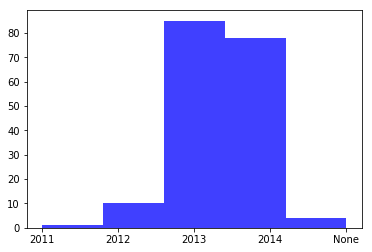

In [33]:
num_bins = 5
n, bins, patches = plt.hist(cog_psych_df['year_publish'], num_bins, facecolor='blue', alpha=.75)
plt.show()

In [5]:
#creates one big long string of all the tokenized text
cog_psych_nTokens = cog_psych_df['normalized_tokens'].sum()
cog_psych_tTokens = cog_psych_df['tokenized_text'].sum()

In [6]:
#convert the tokens into a text object to do some of the 
#basic corpus linguistics
cog_psych_nText = nltk.Text(cog_psych_nTokens)
cog_psych_tText = nltk.Text(cog_psych_tTokens)

In [6]:
# defines a wordcounting function, 
#requires single string as input, which is the above 
#text object
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

In [7]:
wordCounter(cog_psych_nTokens)

,count,word
0,2038,one
1,93,core
2,424,problem
3,1178,learn
4,468,determin
5,671,rang
6,2272,task
7,43,circumst
8,1008,train
9,267,paradigm


In [8]:
wordCounter(cog_psych_tTokens)

,count,word
0,1939,one
1,32437,of
2,55238,the
3,84,core
4,229,problems
5,20862,in
6,966,learning
7,7872,is
8,57,determining
9,446,range


In [9]:
#use this cell to see how a word is normalized
porter = nltk.stem.porter.PorterStemmer()
print (porter.stem('mechanic'))

mechan


In [10]:
#shows concordance with a given word
cog_psych_Index = nltk.text.ConcordanceIndex(cog_psych_tText) 
cog_psych_Index.print_concordance('mechanical', width = 100, lines = 118)

Displaying 7 of 7 matches:
 WBS patients and MA-matched controls on the mechanical ( control ) aspect showed no difference betw
ormed similarly to CA controls in sequencing mechanical stories , while WBS425 performed more poorly
ormed similarly to MA controls in sequencing mechanical stories whereas WBS 425 performed significan
ted this effect to a `` poor compensation of mechanical asymmetries of the orbital planes existing i
ry simple , transparent objects that have no mechanical components and do not involve the use of too
sly giving the toy to the infant . Through a mechanical apparatus ( see Figure 2.A ) , the two ident
 two real toys appear on the table through a mechanical device . The infants ’ first attempt to reac


In [49]:
#frequency distribution of the words in the article contents
words = [word.lower() for word in soc_psych_Text]
freq = nltk.FreqDist(words)
print (freq['mechan']) #prints the number of times the word occurs


373


In [138]:
#finds the bigram collocations
soc_psych_Bigrams = nltk.collocations.BigramCollocationFinder.from_words(soc_psych_df['tokenized_text'].sum())
print("There are {} bigrams in the finder".format(soc_psych_Bigrams.N))

There are 1559108 bigrams in the finder


In [131]:
#function for Bigram scoring to comapre bigrams. 
def bigramScoring(count, wordsTuple, total):
    return count

print(soc_psych_Bigrams.nbest(bigramScoring, 10))

[('thi', 'studi'), ('et', 'al'), ('social', 'network'), ('mental', 'health'), ('f', 'p'), ('studi', 'wa'), ('signific', 'differ'), ('wa', 'use'), ('statist', 'signific'), ('suicid', 'attempt'), ('present', 'studi'), ('social', 'support'), ('logist', 'regress'), ('standard', 'deviat'), ('previou', 'studi'), ('age', 'year'), ('wa', 'associ'), ('suicid', 'ideat'), ('wa', 'also'), ('health', 'care'), ('wa', 'signific'), ('condom', 'use'), ('social', 'capit'), ('men', 'women'), ('odd', 'ratio'), ('see', 'tabl'), ('r', 'p'), ('public', 'health'), ('gener', 'trust'), ('inform', 'consent'), ('physic', 'activ'), ('depress', 'symptom'), ('sex', 'differ'), ('higher', 'level'), ('risk', 'factor'), ('wa', 'significantli'), ('high', 'level'), ('thi', 'wa'), ('regress', 'model'), ('age', 'group'), ('data', 'collect'), ('data', 'set'), ('ha', 'shown'), ('research', 'ha'), ('confid', 'interv'), ('wa', 'found'), ('implicit', 'attitud'), ('sampl', 'size'), ('high', 'school'), ('nation', 'attach'), ('thi'

In [155]:
#I think this can be used for scoring a given bigram, but I don't know how it works. 
    def score_ngram(self, score_fn, w1, w2):
        """Returns the score for a given bigram using the given scoring
        function.  Following Church and Hanks (1990), counts are scaled by
        a factor of 1/(window_size - 1).
        """
        n_all = self.N
        n_ii = self.ngram_fd[(w1, w2)] / (self.window_size - 1.0)
        if not n_ii:
            return
        n_ix = self.word_fd[w1]
        n_xi = self.word_fd[w2]
        return score_fn(n_ii, (n_ix, n_xi), n_all)

IndentationError: unexpected indent (<ipython-input-155-f4917330e720>, line 2)

In [137]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
soc_psych_Bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:10]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('et', 'al'), 7116.69363892705),
 (('f', 'p'), 3799.839677429551),
 (('mental', 'health'), 3693.4447716796826),
 (('logist', 'regress'), 3567.208638973463),
 (('standard', 'deviat'), 3047.8418136356063),
 (('suicid', 'attempt'), 2943.214155354737),
 (('thi', 'studi'), 2829.104673977314),
 (('suicid', 'ideat'), 2782.716950827913),
 (('statist', 'signific'), 2509.560603660926),
 (('odd', 'ratio'), 2507.237148729101),
 (('social', 'network'), 2346.631582755625),
 (('cronbach', 'alpha'), 2094.918932224532),
 (('confid', 'interv'), 2042.6149200570944),
 (('social', 'capit'), 1982.1773136754916),
 (('ethic', 'committe'), 1781.2766518145452),
 (('inform', 'consent'), 1760.5527251554208),
 (('health', 'care'), 1651.465392097959),
 (('gener', 'trust'), 1632.762865571061),
 (('nation', 'attach'), 1627.4432165287246),
 (('year', 'old'), 1621.7469781983054),
 (('signific', 'differ'), 1605.6209787617124),
 (('depress', 'symptom'), 1600.8610938907782),
 (('music', 'sophist'), 1582.288494906465),
 

In [98]:
#measuring the difference between the corpora using Kolmogorov-Smirnov score 
#removes the words not found in both corpora 
soc_psychWords = set(soc_psych_df['normalized_tokens'].sum())
cog_psychWords = set(cog_psych_df['normalized_tokens'].sum())

#Change & to | if you want to keep all words
overlapWords = soc_psychWords & cog_psychWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

2445

In [99]:
#function for creating array of word overlaps 
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #The word is not common so we skip it
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

In [100]:
soc_psychProbArray = makeProbsArray(soc_psych_df['normalized_tokens'], overlapWordsDict)
cog_psychProbArray = makeProbsArray(cog_psych_df['normalized_tokens'], overlapWordsDict)
cog_psychProbArray.sum()

1.0

In [101]:
soc_psychProbArray.sum()

1.0

In [102]:
soc_psych_cog_psychDivergence = scipy.stats.entropy(soc_psychProbArray, cog_psychProbArray)
print (soc_psych_cog_psychDivergence)
cog_psych_soc_psychDivergence = scipy.stats.entropy(cog_psychProbArray, soc_psychProbArray)
print (cog_psych_soc_psychDivergence)

0.26613853638636364
0.2517549238656105


In [103]:
#displays which words distinguish the corpora
soc_psych_cog_psychDivergence_ew = scipy.special.kl_div(soc_psychProbArray, cog_psychProbArray)
kl_df = pd.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = soc_psych_cog_psychDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,ericsson,8.742370e-08
1,retriev,1.190779e-04
2,subdivid,1.001316e-07
3,recruit,2.222819e-06
4,car,3.344819e-05
5,precis,1.870103e-05
6,import,5.350265e-05
7,neutral,6.091497e-04
8,shi,3.934909e-06
9,albeit,3.230124e-07


In [104]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
1192,sexual,0.004334
6298,suicid,0.003830
1920,user,0.002930
6649,task,0.002386
4794,countri,0.002319
2242,social,0.002145
5534,hiv,0.001951
432,neighborhood,0.001909
5707,cognit,0.001791
6007,commun,0.001766


In [126]:
#functions for calculating divergence
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)
